In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('Color_var1.PNG')

def fixColor(img):
  return(cv2.cvtColor(img,cv2.COLOR_BGR2RGB ))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(gray, (5,5), 1)

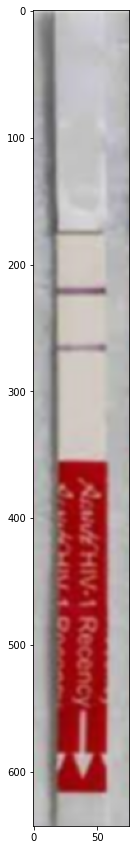

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(blur,cmap='gray')

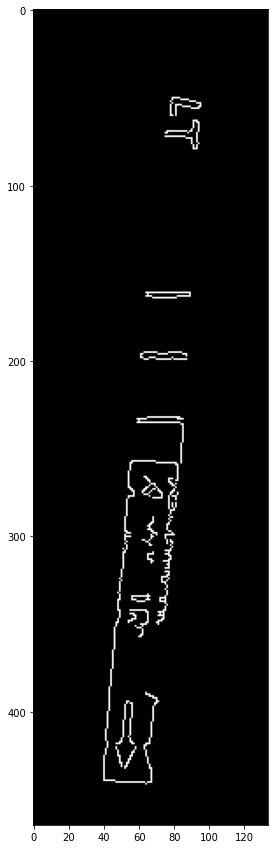

In [ ]:
edge = cv2.Canny(blur,100,200)
plt.figure(figsize=(15,15))
plt.imshow(fixColor(edge))

#---------------------------------------------------------------------------------------------------------------------------------

#Color detection code 

### Pre-processing ...

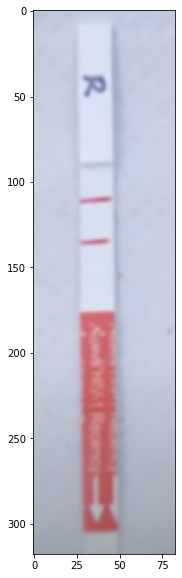

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('rotR.PNG')
img = fixColor(img)

# Convert BGR TO RGB
def fixColor(img):
  return(cv2.cvtColor(img,cv2.COLOR_BGR2RGB ))

# Remove noise - add blur
blur = cv2.GaussianBlur(img, (5,5), 1)

# Display figure
plt.figure(figsize=(3,10))
plt.imshow(blur)

# Convert to HSV space
img_hsv = cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)

### Color threshold

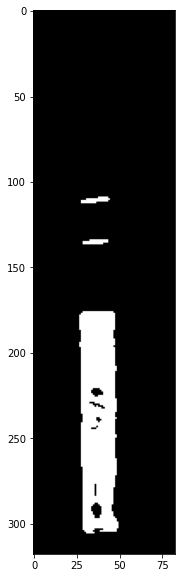

In [ ]:
# Threshold chosen from the HSV tool used 
low_red = np.array([120,47,0])
high_red = np.array([255,255,255])

#high_purple = np.array([255, 255, 255])
#low_purple = np.array([129, 50, 70])
mask = cv2.inRange(img_hsv,low_red,high_red)

#Display the mask image
plt.figure(figsize=(3,10))
plt.imshow(mask,cmap='gray')

### Contour identification

In [ ]:
# Find the contours from the thresholded mask image

#_,thresh = cv2.threshold(grey,155,255,cv2.THRESH_BINARY)
contours,_ = cv2.findContours(mask, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

Mid points [(39, 176), (37, 287), (36, 276), (36, 243), (38, 242), (38, 237), (38, 228), (38, 220), (36, 134), (36, 110)]
Areas [2401.5, 50.5, 14.0, 6.0, 2.0, 9.5, 22.0, 33.0, 22.0, 27.5]


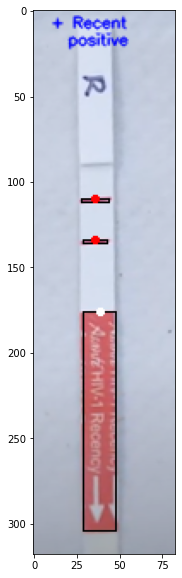

In [ ]:
# Find the area of contours
areas=[]
mid_points = []
rect_coords = []
for c in contours:
  approxes = cv2.approxPolyDP(c, 0.05*cv2.arcLength(c,True), True)
  area = cv2.contourArea(c)
  #print('Approx length',len(approx))
  #print('Area',area)
  areas.append(area)
  x,y,w,h = cv2.boundingRect(approxes)
  rect_coords.append((x,y,w,h))
  
  rectangle_midpoints = round(x+w/2),y
  mid_points.append(rectangle_midpoints)
  
  

#approx = cv2.approxPolyDP(contours[np.argmax(areas)], 0.50*cv2.arcLength(c,True), True)
#cv2.drawContours(img,[approx],0,(0,0,0),1)
#print(approx)
print('Mid points',mid_points)
print('Areas',areas)

#Find the midpoint of rectangle having maximum area
max_rect_midpoint =  mid_points[np.argmax(areas)]

#Find points above the max area rectangle midpoint
key_points = [mp for mp in mid_points if mp[1]< max_rect_midpoint[1] ]

#Draw rectangle on on needed locations

for i,mp in enumerate(mid_points):
  if mp[1]<= max_rect_midpoint[1]:
    cv2.rectangle(img,rect_coords[i],(0,0,0),1)

#Draw a circle in the identified control lines
for i in key_points:
    cv2.circle(img, i, 1, (255,0,0), 2)

#Draw a circle on the baseline identified
cv2.circle(img, max_rect_midpoint, 1, (255,255,255), 2)

#Font configurations
font = cv2.FONT_HERSHEY_SIMPLEX
org = (10, 10)
fontScale = 0.3
color = (0, 0, 255)
thickness = 1

#Display the result
if len(key_points) == 3:
     cv2.putText(img, '+ Positive', org, font,fontScale, color, thickness, cv2.LINE_AA)
if len(key_points) == 2:
     cv2.putText(img, '+ Recent', org, font,fontScale, color, thickness, cv2.LINE_AA)
     cv2.putText(img, 'positive', (20,20), font,fontScale, color, thickness, cv2.LINE_AA)
if len(key_points) == 1:
     cv2.putText(img, '- Negative', org, font,fontScale, color, thickness, cv2.LINE_AA)

#plot the figure
plt.figure(figsize=(3,10))
plt.imshow(img[:,:,:])


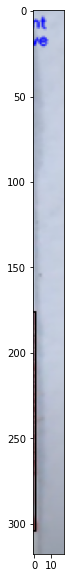

In [ ]:
# Incase to show only the strip
plt.figure(figsize=(3,10))
plt.imshow(img[:,47:65])

#---------------------------------------------------------------------------------------------------------------------------------

#Blob detector

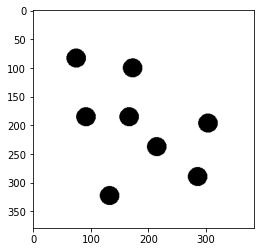

In [ ]:
img_gray = cv2.imread('blobs.jpg',cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
plt.imshow(thresh,cmap='gray')

In [ ]:
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(thresh)
print(keypoints)

[<KeyPoint 0x7f49dd2e35a0>, <KeyPoint 0x7f49dd3ffb10>, <KeyPoint 0x7f49dd3fff90>, <KeyPoint 0x7f49dd3ff810>, <KeyPoint 0x7f49dd3ffc90>, <KeyPoint 0x7f49dd454db0>, <KeyPoint 0x7f49dd2d7cc0>, <KeyPoint 0x7f49dd2d7cf0>]


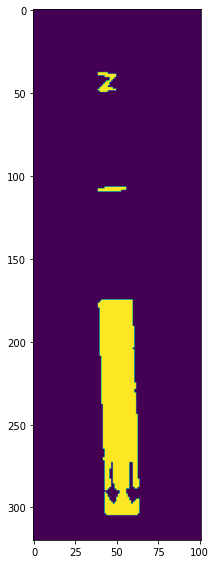

In [ ]:
plt.figure(figsize=(3,10))
plt.imshow(mask)

In [ ]:
keypoints


[]

In [ ]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
'''
# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
'''
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector2 = cv2.SimpleBlobDetector(params)
else : 
	detector2 = cv2.SimpleBlobDetector_create(params)

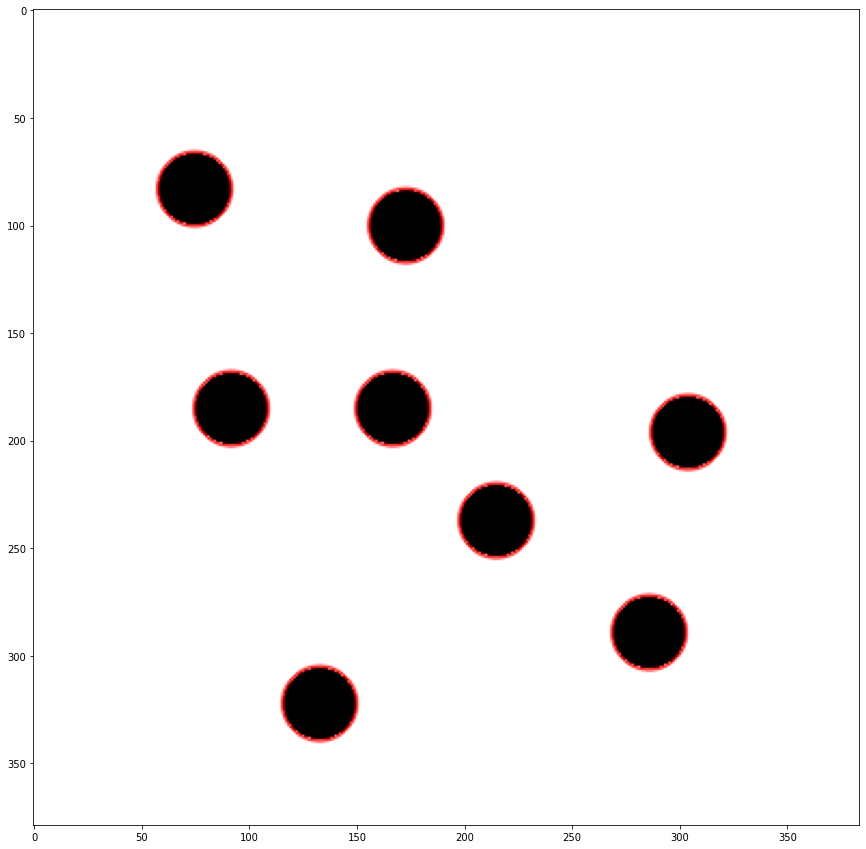

In [ ]:
# Detect blobs.
keypoints = detector2.detect(thresh)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(thresh, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
plt.figure(figsize=(15,15))
plt.imshow(im_with_keypoints)
#cv2.waitKey(0)

In [ ]:
keypoints

[]

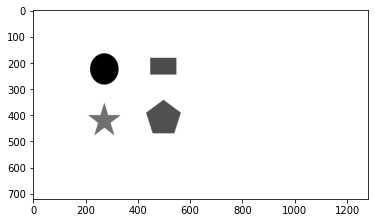

In [ ]:
plt.imshow(img_gray,cmap='gray') 